In [18]:
#imports
import pandas as pd
import pathlib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
import utils.encoding

In [4]:
#path
REPO_ROOT = pathlib.Path.cwd().parent
print(REPO_ROOT)

C:\School\DS3000 Foundations\Project\ds3k


In [5]:
#load training data that jojo created
library_train = pd.read_csv(REPO_ROOT / "data/spotify/group/mutually_exclusive_train_test/library_train.csv", index_col=0)
library_test = pd.read_csv(REPO_ROOT / "data/spotify/group/mutually_exclusive_train_test/library_test.csv", index_col=0)

In [6]:
#drop unneeded columns
library_train = library_train.drop(columns=["artist", "track"])
library_test = library_test.drop(columns=["artist", "track"])

In [7]:
library_train.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,label
uri,,,,,,,,,,,,,,,,,,,,,
4BGZF4oLbTL0pWm7C18pbv,0.413284,0.440223,0.615274,0.030664,0.133805,0.000000,0.080971,0.174273,0.255846,0.301071,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
3WRiWRkolTkYHKqMGsYsOT,0.865929,0.816760,0.717531,0.102934,0.236972,0.000014,0.074001,0.628529,0.335839,0.357607,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,jojo
0CbgB2e5ItzZOA1yZA8Xnt,0.769988,0.557542,0.472926,0.057720,0.185900,0.066146,0.099675,0.003715,0.386092,0.427242,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
3qbqWUDl9j09PeBaQ6CZgr,0.821648,0.650279,0.791823,0.020322,0.142998,0.002406,0.052161,0.637020,0.398865,0.367726,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,richard
0L8LOav65XwLjCLS11gNPD,0.918819,0.577654,0.700455,0.090909,0.076093,0.000000,0.702602,0.525578,0.536536,0.274941,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
5PXyH5bb5fbVfO8LjByhBb,0.531365,0.981006,0.874827,0.212362,0.106226,0.000000,0.371515,0.260242,0.398777,0.303339,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,jojo
0a0TiZm7hjmgyY9i1sWm3Z,0.616236,0.630168,0.748268,0.219577,0.300303,0.000000,0.185641,0.478879,0.194846,0.306315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,richard
0G2wimhVoDYXbQ6csDxtSf,0.815498,0.241341,0.631311,0.142617,0.305410,0.000000,0.060990,0.304819,0.216429,0.358076,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,nick
2zjGJ0dChMR0KxBZS15aqo,0.879459,0.470391,0.624480,0.046777,0.193050,0.000000,0.085850,0.297389,0.335839,0.264016,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,nick


In [8]:
train_x, train_y = library_train.drop(columns='label'), library_train['label']
test_x, test_y = library_test.drop(columns='label'), library_test['label']

# Training and Hyperparameter Optimization <br>
Random Forest Classifier: [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [9]:
#choosing the parameters to work with for randomized search
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 120, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
randParams = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap}
print(randParams)

{'n_estimators': [50, 162, 275, 387, 500], 'max_depth': [10, 32, 54, 76, 98, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [10]:
#randomzied search training
randForest = RandomForestClassifier()
randForestRandom = RandomizedSearchCV(estimator = randForest, param_distributions = randParams, n_iter = 100, cv = 3,
                                     verbose = 2, random_state = 7)
randForestRandom.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=False, max_depth=54, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, max_depth=54, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, max_depth=54, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, max_depth=76, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, max_depth=76, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total tim

[CV] END bootstrap=False, max_depth=54, min_samples_leaf=1, min_samples_split=2, n_estimators=387; total time=   0.3s
[CV] END bootstrap=False, max_depth=54, min_samples_leaf=1, min_samples_split=2, n_estimators=387; total time=   0.3s
[CV] END bootstrap=False, max_depth=54, min_samples_leaf=1, min_samples_split=2, n_estimators=387; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=387; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=387; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=387; total time=   0.3s
[CV] END bootstrap=True, max_depth=98, min_samples_leaf=2, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=98, min_samples_leaf=2, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=98, min_samples_l

[CV] END bootstrap=False, max_depth=32, min_samples_leaf=4, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=False, max_depth=32, min_samples_leaf=4, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, max_depth=32, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=False, max_depth=32, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=False, max_depth=32, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=32, min_samples_leaf=

[CV] END bootstrap=True, max_depth=76, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=120, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=1, min_samples_split=10, n_estimators=162; total time=   0.1s
[CV] END bootstrap=True, max_depth=54, min_samples_leaf=1, m

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=387; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=387; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=387; total time=   0.3s
[CV] END bootstrap=True, max_depth=32, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=32, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=32, min_samples_leaf=1, min_samples_split=5, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=275; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2,

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 54, 76, 98, 120,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 162, 275, 387,
                                                         500]},
                   random_state=7, verbose=2)

In [11]:
#print randomized search best params
print(randForestRandom.best_params_)
print(randForestRandom.best_score_)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 54, 'bootstrap': True}
0.676820377689943


In [12]:
#defining new parameters based on randomzied search
hyperparameters = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1,2,3],
    'n_estimators': [250,300,350,400]
}

In [13]:
#build model and create grid search
randForest = RandomForestClassifier()
randForestGrid = GridSearchCV(estimator = randForest, param_grid = hyperparameters, verbose = 2, cv = 3)
randForestGrid.fit(train_x, train_y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=350; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=350; total time=   0.0s
[CV] END 

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=350; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_sp

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_samples_split=1, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_s

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=350; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_s

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s


C:\School\DS3000 Foundations\Project\ds3k\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\School\DS3000 Foundations\Project\ds3k\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\School\DS3000 Foundations\Project\ds3k\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\School\DS3000 Foundations\Project\ds3k\venv\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [250, 300, 350, 400]},
             verbose=2)

In [14]:
#looking at best parameters
print(randForestGrid.best_params_)
print(randForestGrid.best_score_)

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250}
0.6816688625384278


In [15]:
#create model with best params from grid search
optimizedRandForest = RandomForestClassifier(**randForestGrid.best_params_)
optimizedRandForest.fit(train_x,train_y)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=250)

In [16]:
#scoring
print(f"The Random Forest model's prediction of rings has a r^2 of {optimizedRandForest.score(test_x,test_y): .2f}")

The Random Forest model's prediction of rings has a r^2 of  0.61


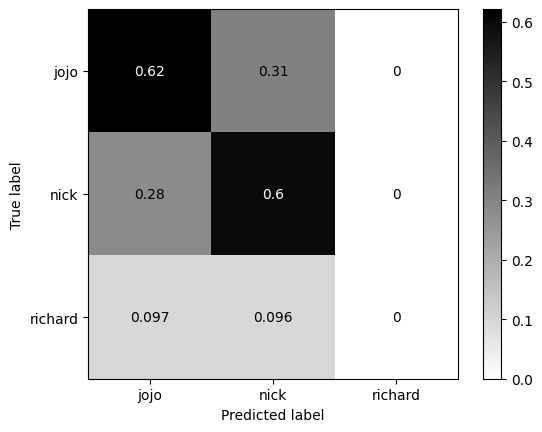

In [19]:
# Making a confusion matrix
true_labels = test_y
predicted_labels = optimizedRandForest.predict(test_x)
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_estimator(optimizedRandForest, test_x, test_y, ax=ax, normalize='pred', cmap='binary')
ax.grid(False)

In [20]:
optimizedRandForest.feature_importances_

array([0.07764972, 0.12990062, 0.08667875, 0.07765958, 0.10509526,
       0.09405286, 0.08522586, 0.11494276, 0.06943587, 0.07527898,
       0.00831425, 0.00831985, 0.00344095, 0.00144293, 0.00606381,
       0.00476152, 0.00286549, 0.00503002, 0.00471038, 0.00407075,
       0.00347864, 0.00383015, 0.01170803, 0.01069612, 0.        ,
       0.00170702, 0.00301767, 0.00062216])

Text(0, 0.5, 'Random Forest Features')

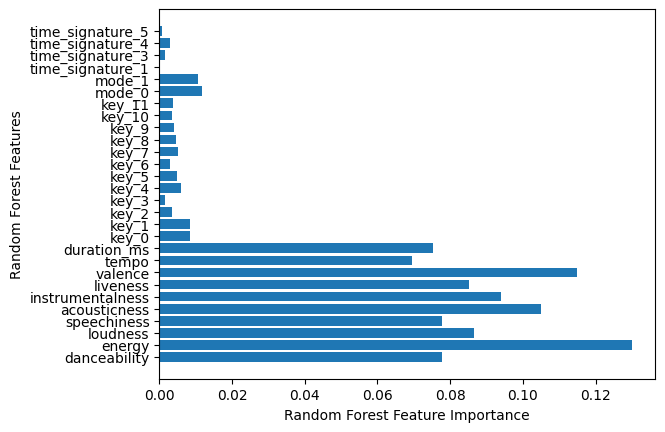

In [30]:
featureHeadersDF = library_train.drop(columns='label')
featureHeaders = list(featureHeadersDF.columns.values)
plt.barh(featureHeaders,optimizedRandForest.feature_importances_)
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Random Forest Features')